# Introduction 

######  Film industry has always been booming and movies made an estimated 42 billion in 2018. It is such a popular industry but what movie make the most revenue at the box office ? 

# Problem Statement

###### Predict  overall worldwide box office revenue of each movie through machine learning techniques. 

## Package Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plot


import json
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

## Data Loading & Overview

In [2]:
movie=pd.read_csv('train.csv')
movie.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [4]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [5]:
print( movie.shape , test.shape)

(3000, 23) (4398, 22)


In [6]:
 movie.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [7]:
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

###### This dataset contains 3000 data points! Let's hope this is enough for our model training. Some of columns contain dictionaries and some are lists of dictionaries. 

###### We found out number of missing values within each column. Top 5 columns with most missing values are 'belongs_to_collection' , 'homepage', 'tagline', 'Keywords', 'production_companies'. 


###### Lets explore our dataset with some viz before feature engineering

## Exploratory Analysis

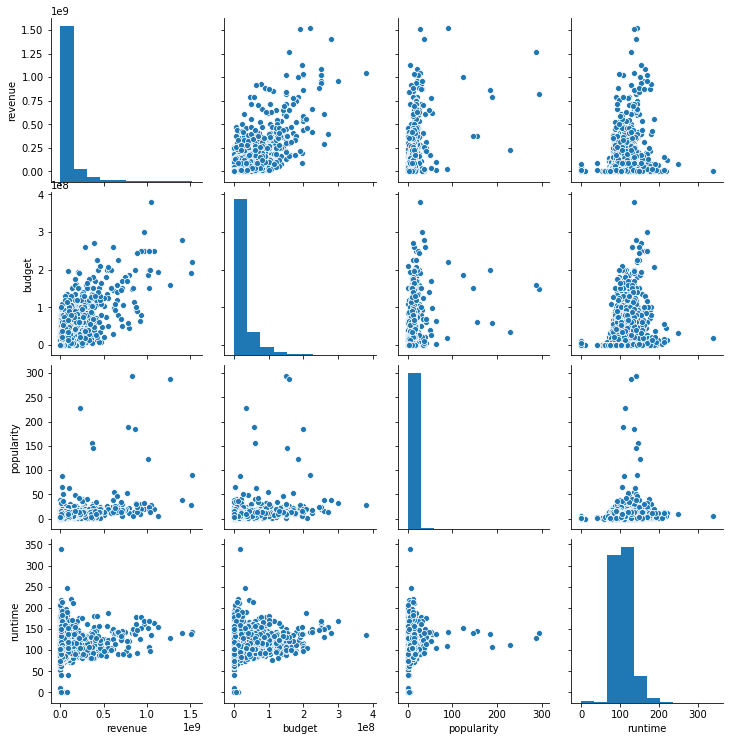

In [8]:
# Pair-wise correlation between numeric variables

corr = movie[['revenue','budget','popularity','runtime']]
sns.pairplot(corr)

Text(0.5, 1, 'Correlation Matrix between Budget, Popularity, Runtime and Revenue')

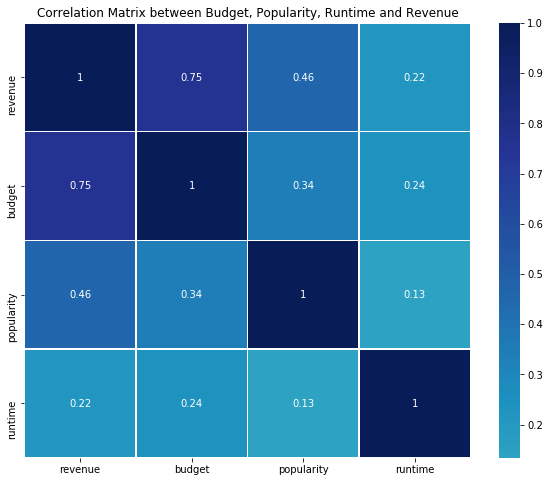

In [9]:
# Correlation Matrix 
col = ['revenue','budget','popularity','runtime']

plt.subplots(figsize=(10, 8))

corr = movie[col].corr()

sns.heatmap(corr, xticklabels=col, yticklabels=col, linewidths=.5, center=0, cmap='YlGnBu',annot=True)
plt.title('Correlation Matrix between Budget, Popularity, Runtime and Revenue' )

Text(0.5, 1.0, 'Distribuition of Revenue')

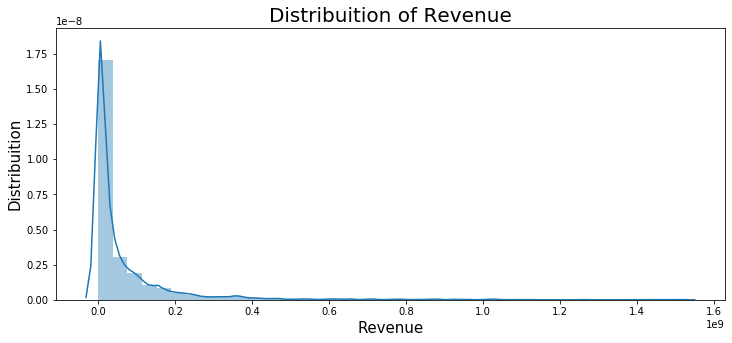

In [10]:
#Distribution of Revenue 


plt.figure(figsize=(12,5))
ax1 = sns.distplot(movie['revenue'], bins=40, kde=True)
ax1.set_xlabel('Revenue', fontsize=15) 
ax1.set_ylabel('Distribuition', fontsize=15) 
ax1.set_title("Distribuition of Revenue", fontsize=20)

###### We spooted that revenue distribution hheavily skewed to the left! It is better to use np.log1p of revenue.

Text(0.5, 1.0, 'Distribuition of Log Revenue')

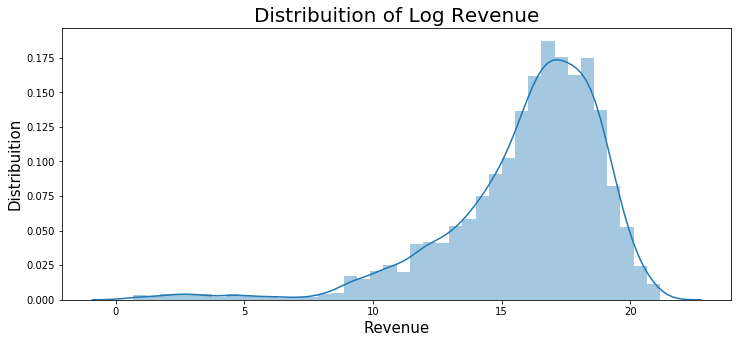

In [11]:
#Distribution of log Revenue 
plt.figure(figsize=(12,5))


ax = sns.distplot(np.log1p(movie['revenue']), bins=40, kde=True)
ax.set_xlabel('Revenue', fontsize=15) 
ax.set_ylabel('Distribuition', fontsize=15) 
ax.set_title("Distribuition of Log Revenue", fontsize=20) 

In [12]:
#Extract year from release_date since most rows have only last two digits of year  provided
movie[['release_month','release_day','release_year']]=movie['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)

# Some rows have 4 digits of year instead of 2, applying (movie['release_year'] < 100) this condition
movie.loc[ (movie['release_year'] <= 19) & (movie['release_year'] < 100), "release_year"] += 2000
movie.loc[ (movie['release_year'] > 19)  & (movie['release_year'] < 100), "release_year"] += 1900

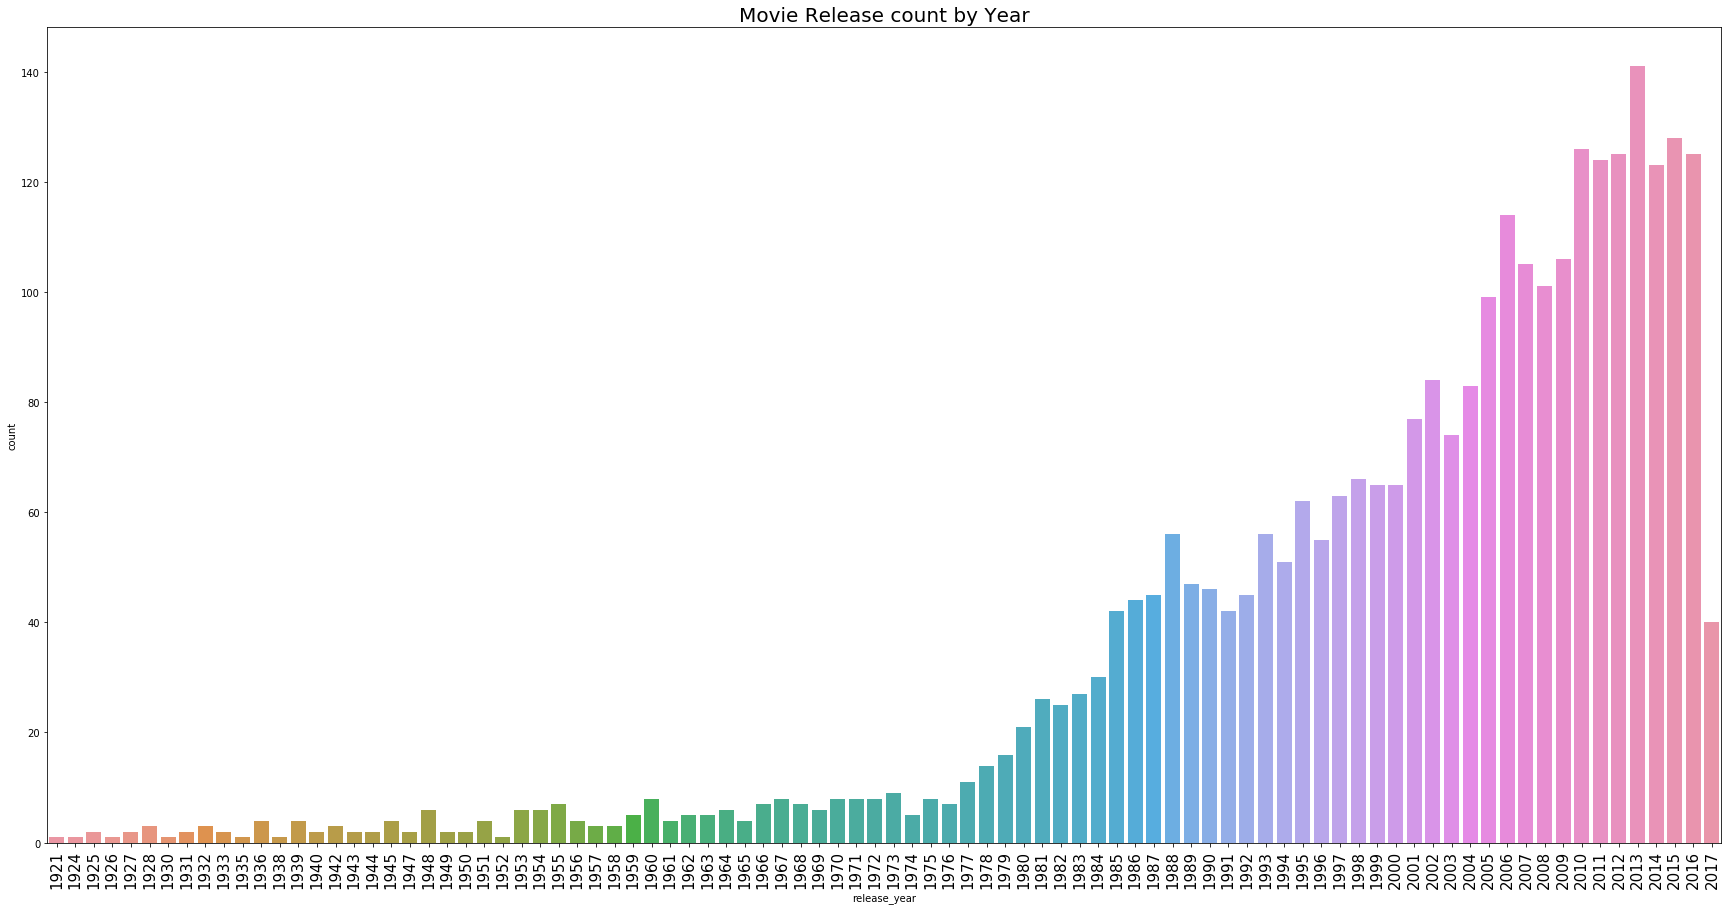

In [13]:
#Movie Release year distribution 

plt.figure(figsize=(30,15))
sns.countplot(movie['release_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=15,rotation=90)
plt.show()

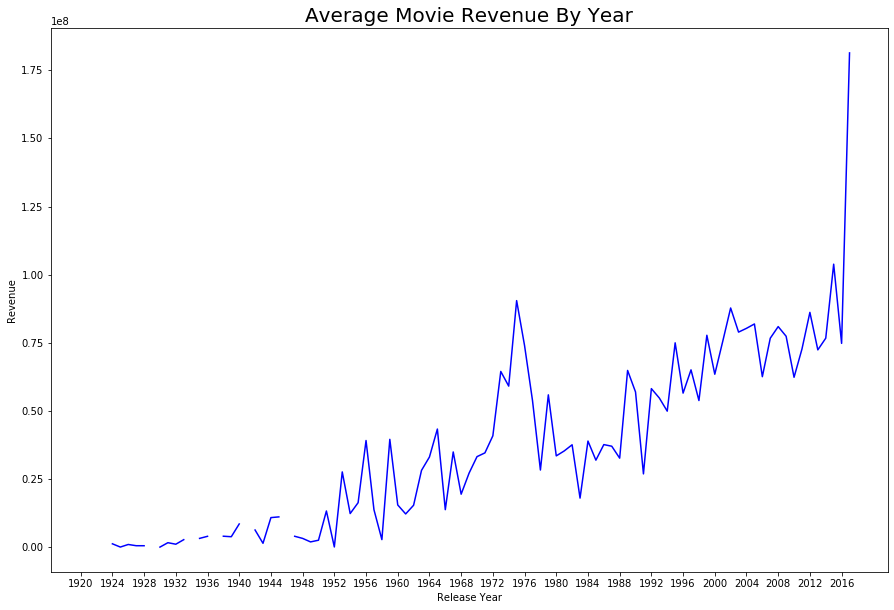

In [14]:
#Average movie revenue by year

movie['AvgRevenueByYear'] = movie.groupby("release_year")["revenue"].aggregate('mean')
movie['AvgRevenueByYear'].plot(figsize=(15,10),color="b")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Average Movie Revenue By Year",fontsize=20)
plt.show()

###### It is not a surprise that average movie reveneu is positively correlated with year. One could factor in inflation, buying power t oexplain

## Pre-processing

### Remove Irrelevant colums

In [15]:
#first remove certain features which are irrelevant for our prediction, drop orignial langauge becasue I suppose only counts of spoke_language helps predict reveneu

movie.drop(['imdb_id','poster_path','original_title','title','original_language','release_date' ],axis=1,inplace=True)
test.drop(['imdb_id','poster_path','original_title','title','original_language','release_date'],axis=1,inplace=True)
movie['log_revenue']=np.log1p(movie['revenue'])

###  belongs_to_collection

In [16]:
# Inspect belongs_to_collection 
for r,v in enumerate(movie['belongs_to_collection'][:5]):
    print(r,v)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 nan
3 nan
4 nan


Text(0.5, 1, 'Log Revenue with and without  collection')

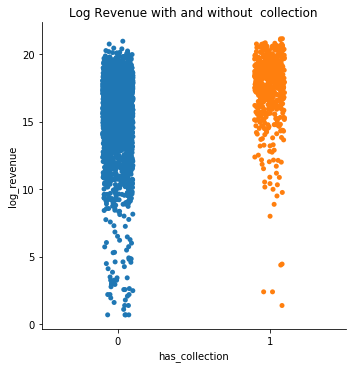

In [17]:
#Converting collections as binary

movie['has_collection'] = 0
movie.loc[movie['belongs_to_collection'].isnull() == False, 'has_collection'] = 1

test['has_collection'] = 0
test.loc[test['belongs_to_collection'].isnull() == False, 'has_collection'] = 1

#Homepage v/s Revenue
sns.catplot(x='has_collection', y='log_revenue', data=movie)
plt.title('Log Revenue with and without  collection')

###### There are 2396 missing values within this column. I suppose name of collection could be useful but will not incorporate in our model . New column named  'has_collection' is created as a binary feature to record whether a movie belongs to a collection or not. 

In [18]:
# Drop the original colleciton column
movie = movie.drop(['belongs_to_collection'], axis=1)
test = test.drop(['belongs_to_collection'], axis=1)

### homepage

Text(0.5, 1, 'Log Revenue With and Without homepage')

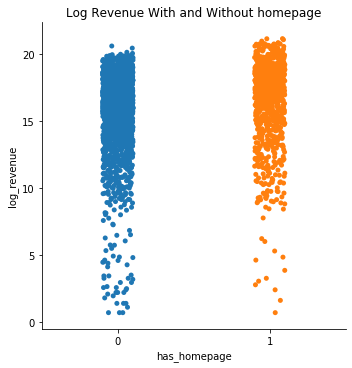

In [19]:
#Converting homepage as binary

movie['has_homepage'] = 0
movie.loc[movie['homepage'].isnull() == False, 'has_homepage'] = 1

test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

#Homepage vs Revenue
sns.catplot(x='has_homepage', y='log_revenue', data=movie)
plt.title('Log Revenue With and Without homepage')

###### There are 2054 missing values within this column. New column named  'has_homepage' is created as a binary feature to record whether a movie belongs to a collection or not. 

In [20]:
# drop the original homepage column
movie = movie.drop(['homepage'], axis=1)
test = test.drop(['homepage'], axis=1)

###  genres 

In [21]:
#Inspect genres 
for r,v in enumerate(movie['genres'][:5]):
    print(r,v)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


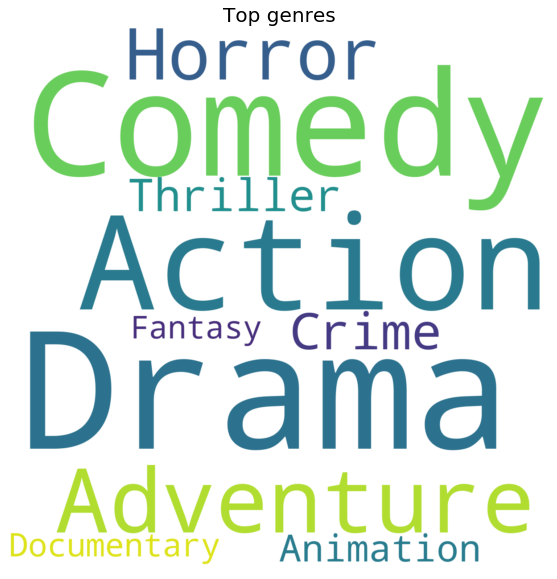

OrderedDict([('Drama', 785),
             ('Comedy', 604),
             ('Action', 520),
             ('Adventure', 187),
             ('Horror', 170),
             ('Crime', 147),
             ('Thriller', 116),
             ('Animation', 76),
             ('Documentary', 71),
             ('Fantasy', 68),
             ('Romance', 67),
             ('Science Fiction', 41),
             ('Family', 36),
             ('Mystery', 33),
             ('War', 20),
             ('Music', 20),
             ('History', 16),
             ('Western', 13),
             ('Foreign', 2),
             ('TV Movie', 1)])

In [22]:
#Count genres and output to a dict 
genres = {}
for i in movie['genres']:
    if(pd.isnull(i) ==False):
        if (eval(i)[0]['name']) in genres:
            genres[eval(i)[0]['name']]+=1
        else:
                genres[eval(i)[0]['name']]=1

plt.figure(figsize = (15, 10))

wordcloud = WordCloud(background_color="white",width=1500,height=1500, max_words=10,normalize_plurals=False).generate_from_frequencies(genres)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Top genres',fontsize = 20)
plt.axis("off")
plt.show()
ordergenres = OrderedDict(genres)

#Drama, Comedy and Thriller are popular genres with more than 500 counts
OrderedDict(sorted(ordergenres.items(), key=lambda x: x[1],  reverse=True))

In [23]:
num_genres=[]
for r in movie['genres']:
    if(pd.isnull(r) ==False):
        
        num_genres.append(len(eval(r)))
        
    else:
        num_genres.append(0)
        
movie['num_genres'] = num_genres

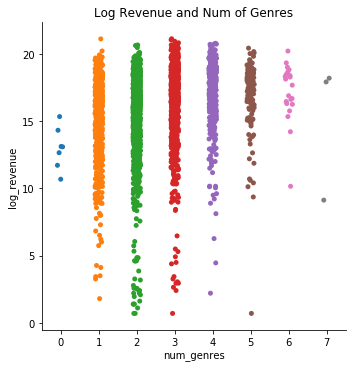

In [24]:
#Genres vs revenue

sns.catplot(x='num_genres', y='log_revenue', data=movie);
plt.title('Log Revenue and Num of Genres');

In [25]:
#Adding genres count to test data
num_genres_test=[]
for r in test['genres']:
    if(pd.isnull(r) ==False):
        
        num_genres_test.append(len(eval(r)))
        
    else:
        num_genres_test.append(0)
        
test['num_genres'] = num_genres_test

In [26]:
## drop the original genre column
movie.drop(['genres'],axis = 1, inplace=True)
test.drop(['genres'],axis=1, inplace = True)

### production_companies

In [27]:
for r,v in enumerate(movie['production_companies'][:5]):
    print(r,v)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 nan
4 nan


In [28]:
#Adding production_companies count for  movie
prod_comp=[]
for r in movie['production_companies']:
    if(pd.isnull(r) ==False):
        
        prod_comp.append(len(eval(r)))
        
    else:
        prod_comp.append(0)
movie['num_prod_companies'] = prod_comp

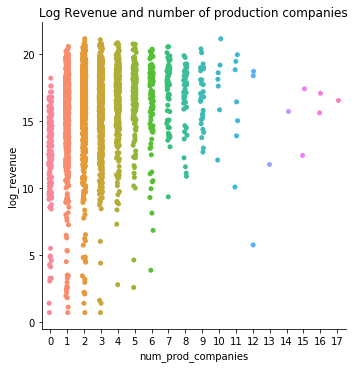

In [29]:
#number of prod companies vs revenue

sns.catplot(x='num_prod_companies', y='log_revenue', data=movie);
plt.title('Log Revenue and number of production companies');

In [30]:
#Adding production_companies count for test data

test_prod_comp=[]
for r in test['production_companies']:
    if(pd.isnull(r) ==False):
        
        test_prod_comp.append(len(eval(r)))
        
    else:
        test_prod_comp.append(0)
test['num_prod_companies'] = test_prod_comp

In [31]:
# Drop original production_companies

movie.drop(['production_companies'],axis=1, inplace = True)
test.drop(['production_companies'],axis=1, inplace = True)

### production_countries

In [32]:
for r,v in enumerate(movie['production_countries'][:5]):
    print(r,v)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]


In [33]:
#Adding production_countries count for movie

prod_cos=[]
for r in movie['production_countries']:
    if (pd.isnull(r)==False):
        prod_cos.append(len(eval(r)))
    else:
        prod_cos.append(0)


movie['num_prod_countries'] = prod_cos

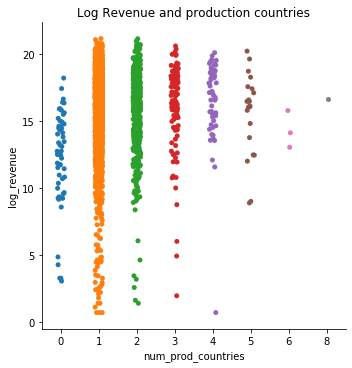

In [34]:
#number of prod countries vs revenue

sns.catplot(x='num_prod_countries', y='log_revenue', data=movie);
plt.title('Log Revenue and production countries');

In [35]:
#Adding production_countries count for  test data
test_prod_co=[]
for r in test['production_countries']:
    if(pd.isnull(r)==False):
        
        test_prod_co.append(len(eval(r)))
        
    else:
        test_prod_co.append(0)
test['num_prod_countries'] = test_prod_co

In [36]:
#Drop original production_countries

movie.drop(['production_countries'],axis=1, inplace = True)
test.drop(['production_countries'],axis=1, inplace = True)

### overview

In [37]:
#inspect overview
for r,v in enumerate(movie['overview'][:5]):
    print(r,v)

0 When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.
1 Mia Thermopolis is now a college graduate and on her way to Genovia to take up her duties as princess. Her best friend Lilly also joins her for the summer. Mia continues her 'princess lessons'- riding horses side-saddle, archery, and other royal. But her complicated life is turned upside down once again when she not only learns that she is to take the crown as queen earlier than expected...
2 Under the direction of a ruthless instructor, a talented young drummer begins to pursue perfection at any cost, even his humanity.
3 Vidya Bagchi (Vidya Balan) arrives in Kolkata from London to find her missing husband Arnab Bagchi. Seven months pregnant and alone in a festive city, she begins a relentless search for her husband. With nothing to rely on except fragments from her memories about him, all clues seem to reach a dead end when ev

Text(0.5, 1, 'Log revenue and overview')

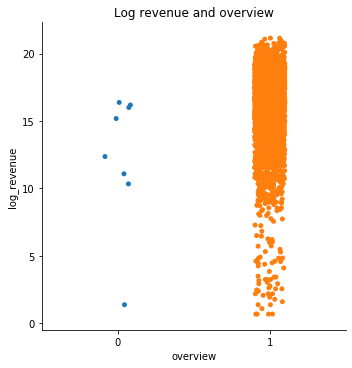

In [38]:
#Transform overview to binary, 1 means overview present

movie['overview']=movie['overview'].map(lambda x: 1 if pd.isnull(x)==False else 0)
test['overview']=test['overview'].map(lambda x: 1 if pd.isnull(x)==False else 0)

#Overview vs revenue
sns.catplot(x='overview', y='log_revenue', data=movie);
plt.title('Log revenue and overview')

### cast

In [39]:
#inspect overview
for r,v in enumerate(movie['cast'][:1]):
    print(r,v)

0 [{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'characte

In [40]:
#Adding cast count for data

total_cast=[]
for r in movie['cast']:
    if(pd.isnull(r)==False):
        
        total_cast.append(len(eval(r)))
        
    else:
        total_cast.append(0)
movie['cast_count'] = total_cast

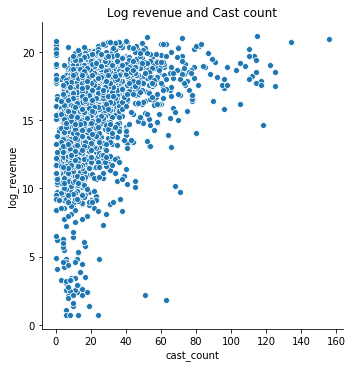

In [41]:
sns.relplot(x="cast_count", y="log_revenue", data=movie);
plt.title('Log revenue and Cast count');

In [42]:
#Adding cast count for  test data

test_total_cast=[]
for r in test['cast']:
    if(pd.isnull(r)==False):
        
        test_total_cast.append(len(eval(r)))
        
    else:
        test_total_cast.append(0)
test['cast_count'] = test_total_cast

In [43]:
#Dropping cast
movie= movie.drop(['cast'],axis=1)
test= test.drop(['cast'],axis=1)

### crew

In [44]:
#inspect crew
for r,v in enumerate(movie['crew'][:1]):
    print(r,v)

0 [{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 14

In [45]:
#Adding crew count for movie data

count_crew=[]
for r in movie['crew']:
    if (pd.isnull(r)==False):
       count_crew.append(len(eval(r)))
    else:
        count_crew.append(0)
movie['count_crew'] = count_crew

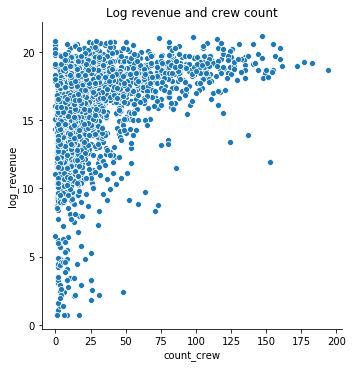

In [46]:
sns.relplot(x="count_crew", y="log_revenue", data=movie);
plt.title('Log revenue and crew count');

In [47]:
# Adding crew count for test data
test_count_crew=[]
for r in test['crew']:
    if (pd.isnull(r)==False):
       test_count_crew.append(len(eval(r)))
    else:
        test_count_crew.append(0)
test['count_crew'] = test_count_crew

In [48]:
#Drop original crew
movie= movie.drop(['crew'],axis=1)
test= test.drop(['crew'],axis=1)

### status

In [49]:
#inspect status

print(f'movie data "status" column value counts: \n{movie.status.value_counts()}\n')

print(f'test data "status" column value counts: \n{test.status.value_counts()}\n')


movie data "status" column value counts: 
Released    2996
Rumored        4
Name: status, dtype: int64

test data "status" column value counts: 
Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64



In [50]:
# Drop status column beacsue values are different in movie and test dataset 

movie.drop(['status'],axis=1,inplace =True)
test.drop(['status'],axis=1,inplace =True)

### Keywords

In [51]:
for r,v in enumerate(movie['Keywords'][:5]):
    print(r,v)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [52]:
#Add keywords count to movie data

count_keywords=[]
for r in movie['Keywords']:
    if(pd.isnull(r)==False):
        
        count_keywords.append(len(eval(r)))
        
    else:
        count_keywords.append(0)
movie['count_keywords'] = count_keywords

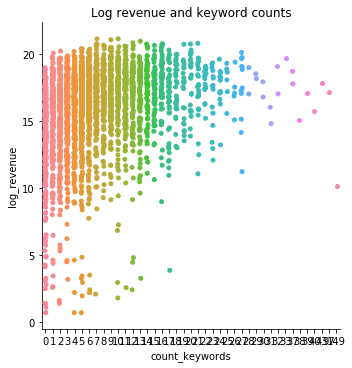

In [53]:
#number of key word counts vs revenue

sns.catplot(x='count_keywords', y='log_revenue', data=movie);
plt.title('Log revenue and keyword counts');

In [54]:
#Add keywords count to test data

test_count_keywords=[]
for r in test['Keywords']:
    if(pd.isnull(r)==False):
        
        test_count_keywords.append(len(eval(r)))
        
    else:
        test_count_keywords.append(0)
test['count_keywords'] = test_count_keywords

In [55]:
#Drop original keywords

movie = movie.drop(['Keywords'], axis=1)
test = test.drop(['Keywords'], axis=1)

### tagline

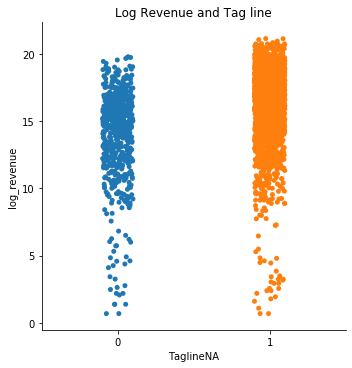

In [56]:
#Transform tagline to with (1) or without(0) tagline

movie['TaglineNA'] = 0
movie.loc[movie['tagline'].isnull() == False, 'TaglineNA'] = 1
test['TaglineNA'] = 0
test.loc[test['tagline'].isnull() == False, 'TaglineNA'] = 1

#Homepage v/s Revenue
sns.catplot(x='TaglineNA', y='log_revenue', data=movie);
plt.title('Log Revenue and Tag line');

In [57]:
#Drop original tagline column

movie.drop(['tagline'],axis=1,inplace =True)
test.drop(['tagline'],axis=1,inplace =True)

### spoken language 

In [58]:
for r,v in enumerate(movie['spoken_languages'][:3]):
    print(r,v)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]


In [59]:
#Adding count spoke_langs for movie data 

langs_count=[]

for r in movie['spoken_languages']:
    if (pd.isnull(r)==False):
        langs_count.append(len(eval(r)))
    else:
        langs_count.append(0)
        
movie['count_langs'] = langs_count

In [60]:
#Adding count spoke_langs for test data 

test_langs_count=[]
for r in test['spoken_languages']:
    if(pd.isnull(r)==False):
        test_langs_count.append(len(eval(r)))
    else:
        test_langs_count.append(0)
        
test['count_langs'] = test_langs_count

In [61]:
#Drop spoken_languages
movie.drop(['spoken_languages'],axis=1,inplace=True)
test.drop(['spoken_languages'],axis=1,inplace=True)

### runtime

In [62]:
#runtime has 2 & 4 occurences of missing value respectively 

movie['runtime'].fillna(value =movie['runtime'].mean(), inplace=True)
test['runtime'].fillna(value = test['runtime'].mean(),inplace=True)


### Drop columns so the dataset is ready for training

In [63]:
movie.drop(['release_month', 'release_year', 'release_day', 'AvgRevenueByYear', 'log_revenue'], axis=1, inplace=True)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3000 non-null   int64  
 1   budget              3000 non-null   int64  
 2   overview            3000 non-null   int64  
 3   popularity          3000 non-null   float64
 4   runtime             3000 non-null   float64
 5   revenue             3000 non-null   int64  
 6   has_collection      3000 non-null   int64  
 7   has_homepage        3000 non-null   int64  
 8   num_genres          3000 non-null   int64  
 9   num_prod_companies  3000 non-null   int64  
 10  num_prod_countries  3000 non-null   int64  
 11  cast_count          3000 non-null   int64  
 12  count_crew          3000 non-null   int64  
 13  count_keywords      3000 non-null   int64  
 14  TaglineNA           3000 non-null   int64  
 15  count_langs         3000 non-null   int64  
dtypes: flo

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4398 non-null   int64  
 1   budget              4398 non-null   int64  
 2   overview            4398 non-null   int64  
 3   popularity          4398 non-null   float64
 4   runtime             4398 non-null   float64
 5   has_collection      4398 non-null   int64  
 6   has_homepage        4398 non-null   int64  
 7   num_genres          4398 non-null   int64  
 8   num_prod_companies  4398 non-null   int64  
 9   num_prod_countries  4398 non-null   int64  
 10  cast_count          4398 non-null   int64  
 11  count_crew          4398 non-null   int64  
 12  count_keywords      4398 non-null   int64  
 13  TaglineNA           4398 non-null   int64  
 14  count_langs         4398 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 515.5 KB


## Model Training

In [65]:
movie.head()

,id,budget,overview,popularity,runtime,revenue,has_collection,has_homepage,num_genres,num_prod_companies,num_prod_countries,cast_count,count_crew,count_keywords,TaglineNA,count_langs
0,1,14000000,1,6.575393,93.0,12314651,1,0,1,3,1,24,72,4,1,1
1,2,40000000,1,8.248895,113.0,95149435,1,0,4,1,1,20,9,4,1,1
2,3,3300000,1,64.299990,105.0,13092000,0,1,1,3,1,51,64,12,1,1
3,4,1200000,1,3.174936,122.0,16000000,0,1,2,0,1,7,3,7,0,2
4,5,0,1,1.148070,118.0,3923970,0,0,2,0,1,4,2,0,0,1


In [66]:
movie['budget'] = np.log1p(movie['budget'])

###### We split the movie data set to training and testing becuase we could not measure success of our model on test data after predicitng the reveneu

In [67]:
cols = [col for col in movie.columns if col not in ['revenue', 'id']]

X=movie[cols].values
y= movie['revenue'].values
y=np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42)

### M1: Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

clf = LinearRegression()
scores = cross_val_score(clf, X, y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

print(f'The Root Mean Square Error for Linear Model is {rmse_scores.mean()}')

The Root Mean Square Error for Linear Model is 2.4274016671284366


### M2: Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=0,
                             n_estimators=500)
scores = cross_val_score(regr, X, y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

print(f'The Root Mean Square Error for Random Forest Model is {rmse_scores.mean()}')

The Root Mean Square Error for Random Forest Model is 2.222831732248588


### Model Testing

In [70]:
#RF
regr.fit(X,y)
y_pred = regr.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df['Diff']=df['Actual']-df['Predicted']
df

,Actual,Predicted,Diff
0,16.039905,14.286386,1.753519
1,2.079442,10.040436,-7.960995
2,10.425283,12.274896,-1.849613
3,16.119826,17.457546,-1.337720
4,16.002777,14.288277,1.714500
...,...,...,...
595,18.822951,14.317108,4.505843
596,17.600387,16.132131,1.468257
597,17.575092,17.799132,-0.224040
598,18.300304,14.715335,3.584969


### M3: Neural Net

In [71]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Using TensorFlow backend.


In [72]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(X_train, y_train,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

600/600 [==============================] - 0s 28us/step


In [73]:
test_mae_score

1.5154976844787598